# Week1 : DataSet + Model 구성하기


## 1. PyKrx 파헤치기
우선 pykrx로 수집 가능한 데이터 목록을 확인하였다.


In [2]:
from pykrx import stock

In [3]:
## ticker 조회
tickers = stock.get_market_ticker_list()
print (len(tickers))
print (tickers[0:10])

951
['095570', '006840', '027410', '282330', '138930', '001460', '001465', '001040', '079160', '00104K']


KOSPI 시장에 등록된 951개 종목의 Ticker를 모두 확인할 수 있다.

In [4]:
for ticker in tickers[0:10]:
    print (ticker, stock.get_market_ticker_name(ticker))

095570 AJ네트웍스
006840 AK홀딩스
027410 BGF
282330 BGF리테일
138930 BNK금융지주
001460 BYC
001465 BYC우
001040 CJ
079160 CJ CGV
00104K CJ4우(전환)


Ticker가 무슨 순서로 반환되나 궁금했는데, 종목명 Alphabetical order로 반환되는 것을 알 수 있었다.

OHLCV: Open, High, Low, Close, Volume
주식의 시가, 고가, 저가, 종가, 거래량이라는 주요 정보를 확인 가능하다.

In [5]:
df = stock.get_market_ohlcv("20230922")
print(df.head())

            시가      고가      저가      종가     거래량        거래대금   등락률
티커                                                              
095570    4210    4260    4110    4215  241580  1007180610 -0.12
006840   18400   18400   18200   18330    2767    50561890  0.38
027410    3570    3600    3560    3575   40129   143286585 -0.42
282330  143000  145000  141200  143000   48466  6906980100 -0.83
138930    6950    7050    6930    7040  682325  4770776990  0.86


In [6]:
df = stock.get_market_price_change("20230901", "20230922")
print(df.head())

            종목명      시가      종가    변동폭   등락률       거래량         거래대금
티커                                                                 
095570   AJ네트웍스    4140    4215     75  1.81  12129705  53797258250
006840    AK홀딩스   19330   18330  -1000 -5.17    102952   1925209470
027410      BGF    3625    3575    -50 -1.38    623725   2255155755
282330   BGF리테일  156400  143000 -13400 -8.57    504545  76149906000
138930  BNK금융지주    6820    7040    220  3.23  13172581  92161202050


Div/Bps/Per/Eps 등 세부 정보도 확인 가능하다.

In [10]:
df = stock.get_market_fundamental("20230922")
print(df.head())

          BPS    PER   PBR    EPS   DIV   DPS
티커                                           
095570   8076  20.97  0.52    201  6.41   270
006840  41948   0.00  0.44      0  1.09   200
027410  16528  14.47  0.22    247  3.08   110
282330  55724  12.76  2.57  11203  2.87  4100
138930  30468   2.93  0.23   2404  8.88   625


거래량, 거래 대금, 투자자별 거래 실적, 외국인 보유량 등의 정보도 확인 가능하다.
시장 전체/ 티커별/ 특정 종목 에 대해 호출해 정보를 확인할 수 있다.

In [14]:
df = stock.get_market_trading_value_by_date("20230901", "20230922", "005930")
print(df.head())

                    기관합계        기타법인            개인         외국인합계  전체
날짜                                                                  
2023-09-01  139427490300 -1161296400 -690605779000  552339585100   0
2023-09-04  -68052267400   392177000 -176985447700  244645538100   0
2023-09-05  -74350579000  -111740400  -47203512700  121665832100   0
2023-09-06  -59255465000   -53886800   -2481822300   61791174100   0
2023-09-07  -38706263000   375561900  -53537474400   91868175500   0


In [13]:
df = stock.get_market_trading_volume_by_investor("20230901", "20230922", "005930") # 삼성전자
print(df.head())

             매도        매수      순매수
투자자구분                             
금융투자   17496001  22483495  4987494
보험      1576714    930898  -645816
투신      2185597   4328441  2142844
사모      3345234   4904165  1558931
은행        74135    195415   121280


In [16]:
df = stock.get_exhaustion_rates_of_foreign_investment('20230922')
print(df.head())

           상장주식수      보유수량        지분율      한도수량      한도소진률
티커                                                        
000020  27931470   1317219   4.718750  27931470   4.718750
000040  96138465  44258009  46.031250  96138465  46.031250
000050  27415270    296866   1.080078  27415270   1.080078
000070   8564271    705161   8.226562   8564271   8.226562
000075    304058      4017   1.320312    304058   1.320312


순매수 상위 종목을 확인할 수 있다.
특정 종목이 아닌 전체 시장에 대해 주제를 잡아보고 싶어 유용할 것 같다.

In [17]:
df = stock.get_market_net_purchases_of_equities("20230901", "20230922", "KOSPI", "개인")
print(df.head())

             종목명     매도거래량     매수거래량   순매수거래량         매도거래대금         매수거래대금  \
티커                                                                            
005490  POSCO홀딩스  10022415  10966828   944413  5760590868000  6308538012000   
373220  LG에너지솔루션    975566   1586967   611401   498478974000   810010465500   
051910      LG화학    897826   1311951   414125   502150126000   723282329000   
003670    포스코퓨처엠   4169795   4662972   493177  1734495216500  1938789703500   
096770   SK이노베이션   2944169   4104267  1160098   491555149000   681441494700   

             순매수거래대금  
티커                    
005490  547947144000  
373220  311531491500  
051910  221132203000  
003670  204294487000  
096770  189886345700  


계속해서, 전체 시장에 대한 정보 확인에 도움이 될 인덱스 조회 API도 있었다.

In [18]:
tickers = stock.get_index_ticker_list()
for ticker in stock.get_index_ticker_list():
    print(ticker, stock.get_index_ticker_name(ticker))

1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업
1021 금융업
1024 증권
1025 보험
1026 서비스업
1027 제조업
1028 코스피 200
1034 코스피 100
1035 코스피 50
1150 코스피 200 커뮤니케이션서비스
1151 코스피 200 건설
1152 코스피 200 중공업
1153 코스피 200 철강/소재
1154 코스피 200 에너지/화학
1155 코스피 200 정보기술
1156 코스피 200 금융
1157 코스피 200 생활소비재
1158 코스피 200 경기소비재
1159 코스피 200 산업재
1160 코스피 200 헬스케어
1167 코스피 200 중소형주
1182 코스피 200 초대형제외 지수
1224 코스피 200 비중상한 30%
1227 코스피 200 비중상한 25%
1232 코스피 200 비중상한 20%
1244 코스피200제외 코스피지수
1894 코스피 200 TOP 10


인덱스의 OHLCV, 등락률, Fundamental (PER/PBR/배당수익률) 등의 정보를 불러올 수 있다.

In [19]:
df = stock.get_index_ohlcv("20230901", "20230922", "1001")
print(df.head())

코스피              시가       고가       저가       종가        거래량            거래대금  \
날짜                                                                          
2023-09-01  2551.93  2568.42  2551.04  2563.71  493367317  10029746225521   
2023-09-04  2566.93  2584.55  2560.32  2584.55  342072516   8699609485382   
2023-09-05  2578.91  2586.65  2575.19  2582.18  384579023   7590068827455   
2023-09-06  2577.41  2585.98  2560.09  2563.34  422126144   7626693242222   
2023-09-07  2554.87  2562.42  2539.24  2548.26  377270533   8325826544902   

코스피                   상장시가총액  
날짜                            
2023-09-01  2033321986422776  
2023-09-04  2050034095713728  
2023-09-05  2048141824784019  
2023-09-06  2033216059472071  
2023-09-07  2021630331132979  


In [21]:
df = stock.get_index_price_change("20230901", "20230922", "KOSPI")
print(df.head())

                   시가       종가       등락률         거래량             거래대금
지수명                                                                  
코스피           2556.27  2508.13 -1.879883  6579159795  137139862796418
코스피 200        334.75   332.02 -0.819824  1638567429   96473847463513
코스피 100       2520.95  2500.72 -0.799805  1079781716   80290572961747
코스피 50        2309.65  2289.67 -0.870117   728073149   65753024154491
코스피 200 중소형주  1209.82  1188.67 -1.750000   558785713   16183274501766


In [22]:
df = stock.get_index_fundamental("20230901", "20230922", "1001")
print(df.head())

                 종가   등락률    PER  선행PER   PBR  배당수익률
날짜                                                  
2023-09-01  2563.71  0.29  15.68    0.0  0.94   1.93
2023-09-04  2584.55  0.81  15.81    0.0  0.95   1.92
2023-09-05  2582.18 -0.09  15.80    0.0  0.95   1.92
2023-09-06  2563.34 -0.73  15.68    0.0  0.94   1.93
2023-09-07  2548.26 -0.59  15.59    0.0  0.93   1.94


공매도/ ETX / 채권 등에 대한 API도 있지만 이번 프로젝트에서는 사용하지 않을 것 같아 제외하였다.

## 2. DataSet 구성하기

특정 종목에 대해 집중하기 보다는, 전체적인 시장 흐름을 예측하는 모델을 해보고 싶었다. 과거 시간대 수치의 변화를 가지고 예측하는 것은 경제학적 인사이트가 부족해 이보다는, 실제 사회적인 분위기와 연관지어 예측하는 모델을 만들어 보면 좋을 것 같았고, 뉴스 헤드라인을 크롤링해 이를 바탕으로 코스피 지수의 등락을 예측하는 자연어 처리 모델을 설계해보기로 하였다.

### 2.1 News Headline Crawling

뉴스 헤드라인 데이터는 네이버 뉴스에서 크롤링하기로 하였다. 사이트를 분석해 본 결과 2021년 1월 1일부터 현재까지 각 날짜별로 언론사 인기 헤드라인을 확인할 수 있었다. 또, 각 날짜별로 랜덤하게 12개 언론사의 Top 5 헤드라인이 표시된다. 이 방법은 언론사 별로 겹치는 헤드라인이 많아, 한 언론사에서 모든 헤드라인을 추출하기로 하였다. 이 경우 2020년 11월 16일부터 언론사의 20개 헤드라인을 확인할 수 있었다. 특별한 의미는 없고, 언론사 코드 001을 사용하는 연합뉴스의 헤드라인을 크롤링하기로 하였다.

In [36]:
## Import modules
import requests
from bs4 import BeautifulSoup
import datetime
BASE_URL = 'https://media.naver.com/press/001/ranking?type=popular&date='

In [46]:
def CrawlHeadlines(date):
    ## Get HTML
    response = requests.get(BASE_URL + date)
    html = response.text

    ## parse class "press_ranking_list"
    soup = BeautifulSoup(html, 'html.parser')
    ranking_list = soup.select('.list_title')
    headlines = []
    ## parse all text in ranking_list
    for headline in ranking_list:
        headlines.append(headline.text)
    return headlines


Parsing이 제대로 일어나는 것을 확인하기 위해 오늘 날짜의 헤드라인을 확인해보았다.

In [47]:
now = datetime.datetime.now()
nowDate = now.strftime('%Y%m%d')
print(CrawlHeadlines(nowDate))

['"지하철 타는 게 낙…" NYT \'무료승차\' 韓노인의 하루 조명', "한총리에 '뼈있는 발언' 시진핑…中 발표문엔 '방한' 언급 없어", '[아시안게임] \'올림픽 이어 기수\' 구본길 "김서영과 함께라 부담 덜 해"', "서울 송파·김포서 일가족 5명 숨져…'돈문제 갈등' 유서(종합2보)", '친환경·디지털·스마트…제19회 항저우 아시안게임 화려한 개막(종합)', '흑해함대 공격한 우크라 "러 고위 지휘관 숨져…수십명 사상"', '[아시안게임] 북한 인공기 게양 금지인데…개회식서도 펄럭(종합)', '尹대통령 "천안·홍성 국가첨단산업단지 조성 빈틈없이 챙길 것"', '시진핑, 한총리에 "방한 진지 검토…한반도 평화 안정에 노력"(종합)', '9개월 전과 다르네?… 미국 찾아간 젤렌스키에 미묘한 온도차', '英서 140여년 전 숨진 에티오피아 왕자, 머리카락만 고국 품으로', '친환경·디지털·스마트…제19회 항저우 아시안게임 화려한 개막', '이재명, 의료진 권고에 24일차에 단식 중단…"법원 출석"(종합2보)', '이재명 체포동의안 가결에 비명계 의원들 살인예고…40대 검거', '14일만에 달 남극에 해가 떴지만…영원히 잠든 인도 달착륙선', '"반갑다 인왕봉" 57년만에 빗장푼 무등산 정상…尹대통령도 축전(종합)', "뉴욕증시, 연준 당국자들 '매파 발언'에 하락…다우 0.31%↓ 마감", '[아시안게임] 북한 인공기 게양 금지인데…곳곳에서 버젓이 펄럭', '디즈니코리아 대표 "\'무빙\' 시즌2 당연히 검토…의지 확고해"', '포스트 말론이 들어 올린 젊음의 축배…"지금 더 사랑하라"']


In [42]:
Columns = ['Date']
for i in range (1, 21):
    Columns.append('Headline' + str(i))

print (Columns)

['Date', 'Headline1', 'Headline2', 'Headline3', 'Headline4', 'Headline5', 'Headline6', 'Headline7', 'Headline8', 'Headline9', 'Headline10', 'Headline11', 'Headline12', 'Headline13', 'Headline14', 'Headline15', 'Headline16', 'Headline17', 'Headline18', 'Headline19', 'Headline20']


In [53]:
## Create a CSV 
import csv
f = open('Headlines.csv', 'w', encoding='utf-8', newline='')
wr = csv.writer(f)
wr.writerow(Columns)

# Loop date from 2020-11-16 to 2023-09-24
start_date = datetime.date(2020, 11, 16)
end_date = datetime.date(2023, 9, 24)
delta = datetime.timedelta(days=1)

while start_date <= end_date:
    date = start_date.strftime('%Y%m%d')
    headlines = CrawlHeadlines(date)
    if len(headlines) == 0: ## 일부 날짜 데이터가 누락된 경우가 있음
        start_date += delta
        continue
    headlines.insert(0, date)
    wr.writerow(headlines)
    start_date += delta

f.close()

### 2.2 KOSPI 등락 수집

같은 기간에 대해 KOSPI 지수의 등락 정보도 PyKrx를 이용해 수집하였다. 우선 후에 사용할 수 있으니 등락률을 그대로 저장하기로 하였다.

In [63]:
df = stock.get_index_fundamental("20201116", "20230924", "1001")
df = df['등락률']

# 날짜 양식 변경 (YYYYMMDD)
df.index = df.index.map(lambda x: str(x).replace("-", ""))
df.index = df.index.map(lambda x: str(x)[0:8])
print(df.head())

## Save as CSV
df.to_csv("KOSPI.csv", mode='w')

날짜
20201116    1.97
20201117   -0.15
20201118    0.26
20201119    0.07
20201120    0.24
Name: 등락률, dtype: float64


주의하여야 할 점은 시장이 쉬는 날의 등락률을 0으로 처리해 사용할지, 해당 날짜는 완전히 제외하고 사용할지를 고민해 보아야 한다.

## 3. Model 구성하기

In [14]:
import pandas as pd
kospi = pd.read_csv("KOSPI.csv", index_col=0)
headlines = pd.read_csv("Headlines.csv", index_col=0)

In [15]:
kospi. head()


,등락률
날짜,
20201116,1.97
20201117,-0.15
20201118,0.26
20201119,0.07
20201120,0.24


In [16]:
headlines.head()

,Headline1,Headline2,Headline3,Headline4,Headline5,Headline6,Headline7,Headline8,Headline9,Headline10,Headline11,Headline12,Headline13,Headline14,Headline15,Headline16,Headline17,Headline18,Headline19,Headline20
Date,,,,,,,,,,,,,,,,,,,,
20201116,"'명상앱' 만든 혜민스님, 승려된 12년간 '안거 수행' 전무",수도권·강원 거리두기 곧 격상…1.5단계 땐 뭐가 달라지나,"군, 29일까지 수도권·강원 '1.5단계'로 격상…휴가 현행유지(종합)","[이슈 컷] ""월세 얼마? 사망 자녀는? 나라에 신상 털린 느낌""","'푸른 눈의 수행자' 현각스님 ""혜민스님, 사업자이자 배우""","혜민스님 활동 중단 선언…""실망한 모든 분께 참회""(종합)",대한항공·아시아나 통합 국적항공사 출범…산은 8천억 투입(종합2보),지하차도 침수 방치에 물놀이 상황극 벌여 해결한 태국 주민,"신천지 탈퇴자 ""신도들 사이서 이만희는 하나님과 같아""","방송인 사유리, 정자 기증받아 비혼모 됐다",마일리지 어찌되나…대한항공·아시아나 통합에 소비자도 불안,"화이자 이어 모더나 ""코로나백신 효과 94.5%…게임체인저 될 것""(종합)","정부, 수도권·강원 '1.5단계' 격상 방침…내일 발표할 듯","산은, 한진칼에 8천억 투입…대한항공의 아시아나 인수 추진(종합)","[속보] 정은경 ""코로나19 감염력 1 넘어…2~4주후 300~400명 발생 가능""","박능후, 내일 긴급 브리핑…수도권-강원 1.5단계 격상 발표할듯","신규확진 223명 사흘째 200명대…휴일임에도 급증, 지역 193명(종합)",트럼프 부도맞나…퇴임 후 기다리는 건 가족사업 재정난,"오바마 ""우린 규칙과 법 위에 있지 않아""…'불복' 트럼프 비난","혜민스님 활동 중단 선언…""다시 공부하고 수행 정진"""
20201117,수도권 거리두기 1.5단계로 격상…목요일 0시부터 적용(종합),"""'화학무기 피살' 김정남 아들 김한솔, 미 CIA가 데려갔다""",아내 살해하고 기자회견에서 오열…뻔뻔한 살인범의 두 얼굴,"냉동보관 필요없는 모더나 백신, 예방효과 95%…""게임체인저""(종합2보)","일가족, 어린이보호구역 참변…목격 할아버지 '손자 눈 가렸다'","신규확진 230명 나흘째 200명대, 지역 202명…수도권 1.5단계로(종합)","방송인 사유리, 정자 기증받아 비혼모 됐다","오늘도 200명대 예상…정부, 오전 수도권-강원 1.5단계 확정할듯","신천지 탈퇴자 ""신도들 사이서 이만희는 하나님과 같아""","[이래도 되나요] ""엄카로 후원금 쐈어요"" BJ에 빠져 호구된 10대들",코로나19 백신 연내접종 예고…내년엔 여러 종류 등장할 듯,5층 건물이 걸어갔다…상하이 빌딩에 198개 인공 다리 설치,모더나·화이자 백신 희소식에 잘사는 나라만 웃는다,화웨이 결국 美제재 못 버텨…중저가 아너 스마트폰 매각(종합),"'명상앱' 만든 혜민스님, 승려된 12년간 '안거 수행' 전무","미 간호사가 폭로한 코로나 참상 ""최소한의 치료도 못 받고…""",서울 오늘 오후 6시까지 83명 추가 확진…확산 일로,"'박수현 명예훼손' 강용석측 ""여자 문제 있었던 건 사실""",광주 어린이보호구역 교통사고 2살 아기 숨져…언니·엄마 중상(종합),"화이자 이어 모더나 ""코로나백신 효과 94.5%…게임체인저 될 것""(종합)"
20201118,"신규확진 313명, 81일만에 300명대…'3차 유행' 현실화 우려(종합)","""'화학무기 피살' 김정남 아들 김한솔, 미 CIA가 데려갔다""(종합)","K-바이오, 전 세계 코로나19 치료제·백신 생산기지로 떠올랐다","정부 ""재유행의 기로…거리두기 2단계 격상없이 확산세 차단""(종합)",내일부터 서울-경기-광주 거리두기 1.5단계…무엇이 달라지나,"인니 30대, 마당에 날아든 45억살 운석 팔아 '돈방석'",[팩트체크] 코로나 백신 맞으면 몸에 무선인식칩 삽입된다고?,연일 200명대 확진…내일부터 서울-경기-광주 거리두기 1.5단계,"아이 낳은 성전환 남성, 엄마인가 아빠인가 논란","""동생 울 때마다 아빠가 목 졸랐다"" 두 자녀 살해사건 증언",세계에서 한마리 남은 '하얀 기린' 포착,신라 고분 위에 SUV 주차한 20대 신원 확인…경찰 고발(종합),공공임대 10만호 내놓는다는 전세대책…전세난 잡을 수 있나,"문대통령, 삼성바이오·셀트리온에 ""통큰 투자 감사""","아프리카 사는 뱀 '볼파이톤' 제주서 구조…""애완용 유기 추정""","법무부 ""19일 오후 2시 윤석열 조사"" 통보 시도…대검 반발(종합)",피임주사 대신 독감백신 맞아 임신…미 110억원 배상 판결,퇴임후 각종 수사 직면한 트럼프…바이든은 어떤 선택할까,"미 국방부 ""트럼프 퇴임前 아프간·이라크 미군감축""…공화 반발(종합)","[이래도 되나요] ""기름 넣었다 폐차했어요"" 가짜 경유에 봉변당한 차주들"
20201119,"""이게 마지막 물웅덩이""…브라질 악어들 떼죽음 위기","""면세점 쇼핑하러 비행기 타요""…무착륙 국제 관광비행 뜬다(종합)","부산 해운대·수영·동래, 경기 김포 등 조정대상지역 지정(종합)","이유가 뭘까…WSJ ""백신 계약 서두르지 않는 한국""",서울 오후 6시까지 124명 추가확진…누적 확진자 대구 제칠 듯,모친 30년지기 사주받고 친모 때려 숨지게 한 세 자매 기소(종합),"[이슈 컷] ""요즘 65세가 노인인가요?"" 세대갈등 도화선 된 지하철",전세난이 밀어 올린 집값…전국 아파트값 8년 반 만에 최고 상승,"이재명 찾아간 국민의힘 김은혜…""짐 내려놨다""",오늘 서울 역대 11월 가장 비 많이 온 날…104년 만에 기록 경신(종합),"수도권 일평균 200명 넘으면 2단계 격상 검토…""회식-모임 자제""","박능후 ""확진자 300명대…대규모 재확산 기로의 위태로운 상황""",순천시 사회적 거리두기 2단계 격상…단계 세분화 이후 처음(종합),"신규확진 343명 이틀째 300명대…지역 293명, 대규모 유행 기로(종합)",'두문불출' 트럼프 APEC엔 참석…시진핑과 마지막 정면충돌?,오늘 전세대책 발표…공공임대 10만호 쏟아부어 전세난 잡는다,"금태섭, '두 아들 재산 32억' 주장에 ""돌아가신 장인이 증여""",오늘부터 서울-경기-광주 거리두기 1.5단계…다중시설 인원제한,"인니 30대, 마당에 날아든 45억살 운석 팔아 '돈방석'","국민 46.1% ""코로나19 감염은 어느 정도 운이다"""
20201120,연이은 300명대 확진 '위태위태'…대유행 우려속 순천 2단계로,임용고시 앞두고 노량진 고시학원 최소 26명 확진(종합),오늘 오후 6시까지 이미 약 300명 확진…내일 400명 안팎 나오나,"감염학회 ""거리두기 상향없이 1∼2주지나면 확진자 1천명 육박""","조폭 모친 축하연에 현역 의원들 화환이…당사자들 ""명의 도용""","진선미 ""아파트 환상 버려야…임대로 주거 질 실현 확신""(종합)","바이오엔테크 CEO ""코로나19 백신 12월 공급 가능성"" 재언급",[이슈 컷] 냉동고 가격만 2천200만원…가난한 나라는 백신도 못 맞나,"'운석 로또' 인니인 ""20억 가치?…1천600만원에 팔아 실망""",'딸 KT 부정채용' 김성태 2심서 집행유예…무죄 뒤집혀(종합),집값상승에 전세난까지 겹치자…10대·20대 아파트 매수 늘었다,내일 아침 영하권 내려가며 더 춥다…일요일 오전엔 전국 비,"정부, '3차 유행' 공식화…수도권 일평균 200명 되면 2단계 검토(종합)",집값상승에 전세난까지 겹치자…10대·20대 아파트 매수 늘었다(종합),주호영 경고에도 野 부산파 집단행동…가덕도 자중지란(종합),"트럼프 불복소송, 같은날 경합주 3연패…아득해진 뒤집기 신기루",모친 30년지기 사주받고 친모 때려 숨지게 한 세 자매 기소(종합),"바이든, 트럼프 겨냥 ""완전히 무책임…세계에 해로운 메시지""(종합)","野, '아파트 환상' 진선미 비난…""본인은 왜 아파트 사나""","바이든 ""트럼프의 동기 모르지만 

In [27]:
## Merge two dataframes with key 'Date' of headlines and '날짜' of kospi
df = pd.merge(kospi, headlines, left_index=True, right_index=True)
df.head(7)

,등락률,Headline1,Headline2,Headline3,Headline4,Headline5,Headline6,Headline7,Headline8,Headline9,...,Headline11,Headline12,Headline13,Headline14,Headline15,Headline16,Headline17,Headline18,Headline19,Headline20
20201116,1.97,"'명상앱' 만든 혜민스님, 승려된 12년간 '안거 수행' 전무",수도권·강원 거리두기 곧 격상…1.5단계 땐 뭐가 달라지나,"군, 29일까지 수도권·강원 '1.5단계'로 격상…휴가 현행유지(종합)","[이슈 컷] ""월세 얼마? 사망 자녀는? 나라에 신상 털린 느낌""","'푸른 눈의 수행자' 현각스님 ""혜민스님, 사업자이자 배우""","혜민스님 활동 중단 선언…""실망한 모든 분께 참회""(종합)",대한항공·아시아나 통합 국적항공사 출범…산은 8천억 투입(종합2보),지하차도 침수 방치에 물놀이 상황극 벌여 해결한 태국 주민,"신천지 탈퇴자 ""신도들 사이서 이만희는 하나님과 같아""",...,마일리지 어찌되나…대한항공·아시아나 통합에 소비자도 불안,"화이자 이어 모더나 ""코로나백신 효과 94.5%…게임체인저 될 것""(종합)","정부, 수도권·강원 '1.5단계' 격상 방침…내일 발표할 듯","산은, 한진칼에 8천억 투입…대한항공의 아시아나 인수 추진(종합)","[속보] 정은경 ""코로나19 감염력 1 넘어…2~4주후 300~400명 발생 가능""","박능후, 내일 긴급 브리핑…수도권-강원 1.5단계 격상 발표할듯","신규확진 223명 사흘째 200명대…휴일임에도 급증, 지역 193명(종합)",트럼프 부도맞나…퇴임 후 기다리는 건 가족사업 재정난,"오바마 ""우린 규칙과 법 위에 있지 않아""…'불복' 트럼프 비난","혜민스님 활동 중단 선언…""다시 공부하고 수행 정진"""
20201117,-0.15,수도권 거리두기 1.5단계로 격상…목요일 0시부터 적용(종합),"""'화학무기 피살' 김정남 아들 김한솔, 미 CIA가 데려갔다""",아내 살해하고 기자회견에서 오열…뻔뻔한 살인범의 두 얼굴,"냉동보관 필요없는 모더나 백신, 예방효과 95%…""게임체인저""(종합2보)","일가족, 어린이보호구역 참변…목격 할아버지 '손자 눈 가렸다'","신규확진 230명 나흘째 200명대, 지역 202명…수도권 1.5단계로(종합)","방송인 사유리, 정자 기증받아 비혼모 됐다","오늘도 200명대 예상…정부, 오전 수도권-강원 1.5단계 확정할듯","신천지 탈퇴자 ""신도들 사이서 이만희는 하나님과 같아""",...,코로나19 백신 연내접종 예고…내년엔 여러 종류 등장할 듯,5층 건물이 걸어갔다…상하이 빌딩에 198개 인공 다리 설치,모더나·화이자 백신 희소식에 잘사는 나라만 웃는다,화웨이 결국 美제재 못 버텨…중저가 아너 스마트폰 매각(종합),"'명상앱' 만든 혜민스님, 승려된 12년간 '안거 수행' 전무","미 간호사가 폭로한 코로나 참상 ""최소한의 치료도 못 받고…""",서울 오늘 오후 6시까지 83명 추가 확진…확산 일로,"'박수현 명예훼손' 강용석측 ""여자 문제 있었던 건 사실""",광주 어린이보호구역 교통사고 2살 아기 숨져…언니·엄마 중상(종합),"화이자 이어 모더나 ""코로나백신 효과 94.5%…게임체인저 될 것""(종합)"
20201118,0.26,"신규확진 313명, 81일만에 300명대…'3차 유행' 현실화 우려(종합)","""'화학무기 피살' 김정남 아들 김한솔, 미 CIA가 데려갔다""(종합)","K-바이오, 전 세계 코로나19 치료제·백신 생산기지로 떠올랐다","정부 ""재유행의 기로…거리두기 2단계 격상없이 확산세 차단""(종합)",내일부터 서울-경기-광주 거리두기 1.5단계…무엇이 달라지나,"인니 30대, 마당에 날아든 45억살 운석 팔아 '돈방석'",[팩트체크] 코로나 백신 맞으면 몸에 무선인식칩 삽입된다고?,연일 200명대 확진…내일부터 서울-경기-광주 거리두기 1.5단계,"아이 낳은 성전환 남성, 엄마인가 아빠인가 논란",...,세계에서 한마리 남은 '하얀 기린' 포착,신라 고분 위에 SUV 주차한 20대 신원 확인…경찰 고발(종합),공공임대 10만호 내놓는다는 전세대책…전세난 잡을 수 있나,"문대통령, 삼성바이오·셀트리온에 ""통큰 투자 감사""","아프리카 사는 뱀 '볼파이톤' 제주서 구조…""애완용 유기 추정""","법무부 ""19일 오후 2시 윤석열 조사"" 통보 시도…대검 반발(종합)",피임주사 대신 독감백신 맞아 임신…미 110억원 배상 판결,퇴임후 각종 수사 직면한 트럼프…바이든은 어떤 선택할까,"미 국방부 ""트럼프 퇴임前 아프간·이라크 미군감축""…공화 반발(종합)","[이래도 되나요] ""기름 넣었다 폐차했어요"" 가짜 경유에 봉변당한 차주들"
20201119,0.07,"""이게 마지막 물웅덩이""…브라질 악어들 떼죽음 위기","""면세점 쇼핑하러 비행기 타요""…무착륙 국제 관광비행 뜬다(종합)","부산 해운대·수영·동래, 경기 김포 등 조정대상지역 지정(종합)","이유가 뭘까…WSJ ""백신 계약 서두르지 않는 한국""",서울 오후 6시까지 124명 추가확진…누적 확진자 대구 제칠 듯,모친 30년지기 사주받고 친모 때려 숨지게 한 세 자매 기소(종합),"[이슈 컷] ""요즘 65세가 노인인가요?"" 세대갈등 도화선 된 지하철",전세난이 밀어 올린 집값…전국 아파트값 8년 반 만에 최고 상승,"이재명 찾아간 국민의힘 김은혜…""짐 내려놨다""",...,"수도권 일평균 200명 넘으면 2단계 격상 검토…""회식-모임 자제""","박능후 ""확진자 300명대…대규모 재확산 기로의 위태로운 상황""",순천시 사회적 거리두기 2단계 격상…단계 세분화 이후 처음(종합),"신규확진 343명 이틀째 300명대…지역 293명, 대규모 유행 기로(종합)",'두문불출' 트럼프 APEC엔 참석…시진핑과 마지막 정면충돌?,오늘 전세대책 발표…공공임대 10만호 쏟아부어 전세난 잡는다,"금태섭, '두 아들 재산 32억' 주장에 ""돌아가신 장인이 증여""",오늘부터 서울-경기-광주 거리두기 1.5단계…다중시설 인원제한,"인니 30대, 마당에 날아든 45억살 운석 팔아 '돈방석'","국민 46.1% ""코로나19 감염은 어느 정도 운이다"""
20201120,0.24,연이은 300명대 확진 '위태위태'…대유행 우려속 순천 2단계로,임용고시 앞두고 노량진 고시학원 최소 26명 확진(종합),오늘 오후 6시까지 이미 약 300명 확진…내일 400명 안팎 나오나,"감염학회 ""거리두기 상향없이 1∼2주지나면 확진자 1천명 육박""","조폭 모친 축하연에 현역 의원들 화환이…당사자들 ""명의 도용""","진선미 ""아파트 환상 버려야…임대로 주거 질 실현 확신""(종합)","바이오엔테크 CEO ""코로나19 백신 12월 공급 가능성"" 재언급",[이슈 컷] 냉동고 가격만 2천200만원…가난한 나라는 백신도 못 맞나,"'운석 로또' 인니인 ""20억 가치?…1천600만원에 팔아 실망""",...,집값상승에 전세난까지 겹치자…10대·20대 아파트 매수 늘었다,내일 아침 영하권 내려가며 더 춥다…일요일 오전엔 전국 비,"정부, '3차 유행' 공식화…수도권 일평균 200명 되면 2단계 검토(종합)",집값상승에 전세난까지 겹치자…10대·20대 아파트 매수 늘었다(종합),주호영 경고에도 野 부산파 집단행동…가덕도 자중지란(종합),"트럼프 불복소송, 같은날 경합주 3연패…아득해진 뒤집기 신기루",모친 30년지기 사주받고 친모 때려 숨지게 한 세 자매 기소(종합),"바이든, 트럼프 겨냥 ""완전히 무책임…세계에 해로운 메시지""(종합)","野, '아파트 환상' 진선미 비난…""본인은 왜 아파트 사나""","바이든 ""트럼프의 동기 모르지만 완전히 무책임하다 생각"""
20201123,1.92,"""배 아프다"" 러 12세 소녀 병원 갔더니…뱃속에 머리카락 뭉치",오늘 300명 안팎 나올듯…내일부터 수도권 거리두기 2단계 격상,서울시 '1천만 시민 멈춤기간' 선포…대중교통 운행 감축(종합),"[이슈 컷] ""공무원처럼 3년 육아휴직 쓰게 

이 과정에서, 주식 시장이 열리지 않은 날의 데이터는 모두 제거되었다!

In [28]:
## '등락률' column to 1 or 0
df['등락률'] = df['등락률'].map(lambda x: 1 if x > 0 else 0)
df.head()

,등락률,Headline1,Headline2,Headline3,Headline4,Headline5,Headline6,Headline7,Headline8,Headline9,...,Headline11,Headline12,Headline13,Headline14,Headline15,Headline16,Headline17,Headline18,Headline19,Headline20
20201116,1,"'명상앱' 만든 혜민스님, 승려된 12년간 '안거 수행' 전무",수도권·강원 거리두기 곧 격상…1.5단계 땐 뭐가 달라지나,"군, 29일까지 수도권·강원 '1.5단계'로 격상…휴가 현행유지(종합)","[이슈 컷] ""월세 얼마? 사망 자녀는? 나라에 신상 털린 느낌""","'푸른 눈의 수행자' 현각스님 ""혜민스님, 사업자이자 배우""","혜민스님 활동 중단 선언…""실망한 모든 분께 참회""(종합)",대한항공·아시아나 통합 국적항공사 출범…산은 8천억 투입(종합2보),지하차도 침수 방치에 물놀이 상황극 벌여 해결한 태국 주민,"신천지 탈퇴자 ""신도들 사이서 이만희는 하나님과 같아""",...,마일리지 어찌되나…대한항공·아시아나 통합에 소비자도 불안,"화이자 이어 모더나 ""코로나백신 효과 94.5%…게임체인저 될 것""(종합)","정부, 수도권·강원 '1.5단계' 격상 방침…내일 발표할 듯","산은, 한진칼에 8천억 투입…대한항공의 아시아나 인수 추진(종합)","[속보] 정은경 ""코로나19 감염력 1 넘어…2~4주후 300~400명 발생 가능""","박능후, 내일 긴급 브리핑…수도권-강원 1.5단계 격상 발표할듯","신규확진 223명 사흘째 200명대…휴일임에도 급증, 지역 193명(종합)",트럼프 부도맞나…퇴임 후 기다리는 건 가족사업 재정난,"오바마 ""우린 규칙과 법 위에 있지 않아""…'불복' 트럼프 비난","혜민스님 활동 중단 선언…""다시 공부하고 수행 정진"""
20201117,0,수도권 거리두기 1.5단계로 격상…목요일 0시부터 적용(종합),"""'화학무기 피살' 김정남 아들 김한솔, 미 CIA가 데려갔다""",아내 살해하고 기자회견에서 오열…뻔뻔한 살인범의 두 얼굴,"냉동보관 필요없는 모더나 백신, 예방효과 95%…""게임체인저""(종합2보)","일가족, 어린이보호구역 참변…목격 할아버지 '손자 눈 가렸다'","신규확진 230명 나흘째 200명대, 지역 202명…수도권 1.5단계로(종합)","방송인 사유리, 정자 기증받아 비혼모 됐다","오늘도 200명대 예상…정부, 오전 수도권-강원 1.5단계 확정할듯","신천지 탈퇴자 ""신도들 사이서 이만희는 하나님과 같아""",...,코로나19 백신 연내접종 예고…내년엔 여러 종류 등장할 듯,5층 건물이 걸어갔다…상하이 빌딩에 198개 인공 다리 설치,모더나·화이자 백신 희소식에 잘사는 나라만 웃는다,화웨이 결국 美제재 못 버텨…중저가 아너 스마트폰 매각(종합),"'명상앱' 만든 혜민스님, 승려된 12년간 '안거 수행' 전무","미 간호사가 폭로한 코로나 참상 ""최소한의 치료도 못 받고…""",서울 오늘 오후 6시까지 83명 추가 확진…확산 일로,"'박수현 명예훼손' 강용석측 ""여자 문제 있었던 건 사실""",광주 어린이보호구역 교통사고 2살 아기 숨져…언니·엄마 중상(종합),"화이자 이어 모더나 ""코로나백신 효과 94.5%…게임체인저 될 것""(종합)"
20201118,1,"신규확진 313명, 81일만에 300명대…'3차 유행' 현실화 우려(종합)","""'화학무기 피살' 김정남 아들 김한솔, 미 CIA가 데려갔다""(종합)","K-바이오, 전 세계 코로나19 치료제·백신 생산기지로 떠올랐다","정부 ""재유행의 기로…거리두기 2단계 격상없이 확산세 차단""(종합)",내일부터 서울-경기-광주 거리두기 1.5단계…무엇이 달라지나,"인니 30대, 마당에 날아든 45억살 운석 팔아 '돈방석'",[팩트체크] 코로나 백신 맞으면 몸에 무선인식칩 삽입된다고?,연일 200명대 확진…내일부터 서울-경기-광주 거리두기 1.5단계,"아이 낳은 성전환 남성, 엄마인가 아빠인가 논란",...,세계에서 한마리 남은 '하얀 기린' 포착,신라 고분 위에 SUV 주차한 20대 신원 확인…경찰 고발(종합),공공임대 10만호 내놓는다는 전세대책…전세난 잡을 수 있나,"문대통령, 삼성바이오·셀트리온에 ""통큰 투자 감사""","아프리카 사는 뱀 '볼파이톤' 제주서 구조…""애완용 유기 추정""","법무부 ""19일 오후 2시 윤석열 조사"" 통보 시도…대검 반발(종합)",피임주사 대신 독감백신 맞아 임신…미 110억원 배상 판결,퇴임후 각종 수사 직면한 트럼프…바이든은 어떤 선택할까,"미 국방부 ""트럼프 퇴임前 아프간·이라크 미군감축""…공화 반발(종합)","[이래도 되나요] ""기름 넣었다 폐차했어요"" 가짜 경유에 봉변당한 차주들"
20201119,1,"""이게 마지막 물웅덩이""…브라질 악어들 떼죽음 위기","""면세점 쇼핑하러 비행기 타요""…무착륙 국제 관광비행 뜬다(종합)","부산 해운대·수영·동래, 경기 김포 등 조정대상지역 지정(종합)","이유가 뭘까…WSJ ""백신 계약 서두르지 않는 한국""",서울 오후 6시까지 124명 추가확진…누적 확진자 대구 제칠 듯,모친 30년지기 사주받고 친모 때려 숨지게 한 세 자매 기소(종합),"[이슈 컷] ""요즘 65세가 노인인가요?"" 세대갈등 도화선 된 지하철",전세난이 밀어 올린 집값…전국 아파트값 8년 반 만에 최고 상승,"이재명 찾아간 국민의힘 김은혜…""짐 내려놨다""",...,"수도권 일평균 200명 넘으면 2단계 격상 검토…""회식-모임 자제""","박능후 ""확진자 300명대…대규모 재확산 기로의 위태로운 상황""",순천시 사회적 거리두기 2단계 격상…단계 세분화 이후 처음(종합),"신규확진 343명 이틀째 300명대…지역 293명, 대규모 유행 기로(종합)",'두문불출' 트럼프 APEC엔 참석…시진핑과 마지막 정면충돌?,오늘 전세대책 발표…공공임대 10만호 쏟아부어 전세난 잡는다,"금태섭, '두 아들 재산 32억' 주장에 ""돌아가신 장인이 증여""",오늘부터 서울-경기-광주 거리두기 1.5단계…다중시설 인원제한,"인니 30대, 마당에 날아든 45억살 운석 팔아 '돈방석'","국민 46.1% ""코로나19 감염은 어느 정도 운이다"""
20201120,1,연이은 300명대 확진 '위태위태'…대유행 우려속 순천 2단계로,임용고시 앞두고 노량진 고시학원 최소 26명 확진(종합),오늘 오후 6시까지 이미 약 300명 확진…내일 400명 안팎 나오나,"감염학회 ""거리두기 상향없이 1∼2주지나면 확진자 1천명 육박""","조폭 모친 축하연에 현역 의원들 화환이…당사자들 ""명의 도용""","진선미 ""아파트 환상 버려야…임대로 주거 질 실현 확신""(종합)","바이오엔테크 CEO ""코로나19 백신 12월 공급 가능성"" 재언급",[이슈 컷] 냉동고 가격만 2천200만원…가난한 나라는 백신도 못 맞나,"'운석 로또' 인니인 ""20억 가치?…1천600만원에 팔아 실망""",...,집값상승에 전세난까지 겹치자…10대·20대 아파트 매수 늘었다,내일 아침 영하권 내려가며 더 춥다…일요일 오전엔 전국 비,"정부, '3차 유행' 공식화…수도권 일평균 200명 되면 2단계 검토(종합)",집값상승에 전세난까지 겹치자…10대·20대 아파트 매수 늘었다(종합),주호영 경고에도 野 부산파 집단행동…가덕도 자중지란(종합),"트럼프 불복소송, 같은날 경합주 3연패…아득해진 뒤집기 신기루",모친 30년지기 사주받고 친모 때려 숨지게 한 세 자매 기소(종합),"바이든, 트럼프 겨냥 ""완전히 무책임…세계에 해로운 메시지""(종합)","野, '아파트 환상' 진선미 비난…""본인은 왜 아파트 사나""","바이든 ""트럼프의 동기 모르지만 완전히 무책임하다 생각"""


In [29]:
# Remove Date and Concatenate all headlines, change '등락률' to 'Label'
df['Headlines'] = df[df.columns[1:]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
df = df[['Headlines', '등락률']]
df.columns = ['Headlines', 'Label']
# Drop index
df.reset_index(drop=True, inplace=True)
df.head()

,Headlines,Label
0,"'명상앱' 만든 혜민스님, 승려된 12년간 '안거 수행' 전무 수도권·강원 거리두기...",1
1,"수도권 거리두기 1.5단계로 격상…목요일 0시부터 적용(종합) ""'화학무기 피살' ...",0
2,"신규확진 313명, 81일만에 300명대…'3차 유행' 현실화 우려(종합) ""'화학...",1
3,"""이게 마지막 물웅덩이""…브라질 악어들 떼죽음 위기 ""면세점 쇼핑하러 비행기 타요""...",1
4,연이은 300명대 확진 '위태위태'…대유행 우려속 순천 2단계로 임용고시 앞두고 노...,1


In [54]:
## Split train and test data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)
print(len(train), len(test))


532 133


우선 간단히 n-gram을 이용해 Logistic Regression 모델을 만들어 보았다.

In [55]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

example = CountVectorizer().build_tokenizer()(train.iloc[0]['Headlines'])
print(example)

['뾰루지', '짰다가', '혹으로', '뒤덮인', '얼굴', '필리핀', '10대', '도와주세요', '힙합가수', '아이언', '야구방망이로', '룸메이트', '폭행', '현행범', '체포', '팩트체크', '인터넷에', '퍼진', '윤석열', '검찰의', '수사법', '따져봤더니', '심상치', '않은', '제주', '코로나19', '확산세', '누적', '확진자', '102명', '종합', '야구방망이', '폭행', '쇼미더머니3', '준우승', '래퍼', '아이언', '영장', '종합', '신규확진', '682명', '이틀연속', '700명선', '위협', '중환자', '사망자', '급증', '종합', '어제', '수도권', '자택대기', '코로나', '환자', '506명', '일부', '이틀이상', '대기', '종합', '영국서', '화이자', '백신', '접종', '하루만에', '2명', '알레르기', '반응', '아스트라제네카', '백신', '국내서', '생산', '행정명령', '영향', '덜받을듯', '연말회식', '위험하다는데', '술집', '식당', '닫자', '사무실서', '2차', '뉴욕', '쥐의', '습격에', '닫은', '식당', '아보카도', '먹고', '직원', '물고', '사상', '초유', '검찰총장', '징계위', '기피신청', '준비로', '회의', '중단', '종합', '수도권', '학원만', '3단계', '운영', '중단', '조처에', '집단소송', '움직임', '보름간의', '의심증상', '감기로', '여긴', '60대', '확진자', '음성군', '발칵', '오후', '6시까지', '507명', '내일', '최소', '600명대', '중후반', '700명', '넘을수도', '문대통령', '지지율', '2주', '연속', '최저', '소폭상승', '재역전', '리얼미터', '국내도입', '4개사', '코로나19', '백신', '효능', '부작용', '어떻게', '되나', '아파트', '주차장서', '테슬라', '벽

In [56]:
advancedvectorizer = CountVectorizer(ngram_range=(1, 3))
advancedtrained = advancedvectorizer.fit_transform(train['Headlines'])

advancedmodel = LogisticRegression()
advancedmodel = advancedmodel.fit(advancedtrained, train['Label'])

advancedtest_tokens = advancedvectorizer.transform(test['Headlines'])
advancedpredictions = advancedmodel.predict(advancedtest_tokens)

print(accuracy_score(test['Label'], advancedpredictions))

0.6015037593984962


간단히 만든 모델이라 그닥 만족스러운 결과가 나올 리 없다. 다른 시도도 해보자.

In [76]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [88]:
# Example data
headlines = df['Headlines'].values
labels =  df['Label'].values

# Create a vocabulary from the headlines
vocab = set(word for headline in headlines for word in headline.split())

# Convert words to unique integers
word_to_idx = {word: idx for idx, word in enumerate(vocab)}

# Tokenize headlines into integer sequences
sequences = [[word_to_idx[word] for word in headline.split()] for headline in headlines]

# Pad sequences to a fixed length (adjust as needed)
max_seq_length = 20
sequences = [seq[:max_seq_length] + [0] * (max_seq_length - len(seq)) for seq in sequences]

# Convert sequences to PyTorch tensors
sequences = torch.tensor(sequences, dtype=torch.long)
labels = torch.tensor(labels, dtype=torch.long)


In [89]:
# Split data into train, validation, and test sets
train_sequences, val_sequences, train_labels, val_labels = train_test_split(
    sequences, labels, test_size=0.2, random_state=42
)
train_sequences, test_sequences, train_labels, test_labels = train_test_split(
    train_sequences, train_labels, test_size=0.25, random_state=42
)

# Convert data to PyTorch DataLoader
train_data = TensorDataset(train_sequences, train_labels)
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

val_data = TensorDataset(val_sequences, val_labels)
val_dataloader = DataLoader(val_data, batch_size=32, shuffle=False)

test_data = TensorDataset(test_sequences, test_labels)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)


In [91]:
class NNTextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim, hidden_dim)
        self.out = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        avg_embedded = embedded.mean(1)  # Average pooling over the sequence dimension
        output = torch.relu(self.fc(avg_embedded))
        return self.out(output)


class RNNTextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, _ = self.rnn(embedded)
        output = output[:, -1, :]  # Take the final hidden state
        return self.fc(output)


class LSTMTextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, _ = self.lstm(embedded)
        output = output[:, -1, :]  # Take the final hidden state
        return self.fc(output)


# Initialize the model
for TextClassifier in [NNTextClassifier, RNNTextClassifier, LSTMTextClassifier]:
    model = TextClassifier(vocab_size=len(vocab), embedding_dim=128, hidden_dim=64, output_dim=2)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Number of training epochs
    num_epochs = 50

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        for batch in train_dataloader:
            optimizer.zero_grad()
            text, labels = batch
            outputs = model(text)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_train_loss = total_loss / len(train_dataloader)

        # Validation
        model.eval()
        val_loss = 0

        with torch.no_grad():
            for batch in val_dataloader:
                text, labels = batch
                outputs = model(text)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_dataloader)

        print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f}')



    # Evaluate the model on the test set
    model.eval()
    predictions = []
    total_loss = 0

    with torch.no_grad():
        for batch in test_dataloader:
            text, labels = batch
            outputs = model(text)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            predictions.extend(torch.argmax(outputs, 1).tolist())
    

    avg_test_loss = total_loss / len(test_dataloader)
    print(f'Test Loss: {avg_test_loss:.4f}')

    # Calculate accuracy
    correct = sum([1 if pred == label else 0 for pred, label in zip(predictions, test_labels.tolist())])
    accuracy = correct / len(test_labels)
    print(f'Accuracy: {accuracy:.4f}')

    # Save the model
    torch.save(model.state_dict(), f'{TextClassifier.__name__}.pt')


Epoch 1/50 - Train Loss: 0.6916 - Val Loss: 0.6898
Epoch 2/50 - Train Loss: 0.6765 - Val Loss: 0.6883
Epoch 3/50 - Train Loss: 0.6581 - Val Loss: 0.6871
Epoch 4/50 - Train Loss: 0.6357 - Val Loss: 0.6846
Epoch 5/50 - Train Loss: 0.6030 - Val Loss: 0.6810
Epoch 6/50 - Train Loss: 0.5513 - Val Loss: 0.6766
Epoch 7/50 - Train Loss: 0.4814 - Val Loss: 0.6779
Epoch 8/50 - Train Loss: 0.3861 - Val Loss: 0.6843
Epoch 9/50 - Train Loss: 0.2815 - Val Loss: 0.7043
Epoch 10/50 - Train Loss: 0.1902 - Val Loss: 0.7349
Epoch 11/50 - Train Loss: 0.1210 - Val Loss: 0.7702
Epoch 12/50 - Train Loss: 0.0743 - Val Loss: 0.8057
Epoch 13/50 - Train Loss: 0.0462 - Val Loss: 0.8415
Epoch 14/50 - Train Loss: 0.0304 - Val Loss: 0.8711
Epoch 15/50 - Train Loss: 0.0215 - Val Loss: 0.8976
Epoch 16/50 - Train Loss: 0.0163 - Val Loss: 0.9212
Epoch 17/50 - Train Loss: 0.0123 - Val Loss: 0.9420
Epoch 18/50 - Train Loss: 0.0100 - Val Loss: 0.9596
Epoch 19/50 - Train Loss: 0.0081 - Val Loss: 0.9764
Epoch 20/50 - Train L

이런저런 시도를 해보았는데 그닥 만족스러운 결과는 나오지 않는다. 당연하지만 그 이유로는
- 모델이 한글을 처리하는 데 어려움이 크다. KoBERT 등 모델을 가져올 수 있겠지만 스터디 목적에 부합하지 않을 것 같다.
- 단순히 20개 헤드라인을 합쳤을 때 의미를 찾기 어렵다. N-gram에서는 문제가 없지만 NN 모델을 사용할 때는 적합하지 않은 전처리 방식이다. 

모델을 개선하는 데 더 시간을 많이 투자하기보다는 (이건 담에 해보는거로!), 주제를 선회하기로 하였다.

## 4. 새로운 주제: 지난 10일의 Data로 종가 예측하기!

### 4-1. Data Set 구성하기

Target은 KOSPI로, 사용할 Feature로는 시가, 종가, 고가, 저가, 거래량을 사용하기로 하였다. (나머지 Data는 이로부터 계산 가능한 값이므로 제외!)
Data의 범위는 대략 10년, 2013년 9월 ~ 현재 로 설정하였다.

In [1]:
from pykrx import stock
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = stock.get_index_ohlcv("20150901", "20230922", "1001")
print(df.head())

코스피              시가       고가       저가       종가        거래량           거래대금  \
날짜                                                                         
2015-09-01  1934.44  1939.67  1914.22  1914.23  324479175  4831116174697   
2015-09-02  1886.14  1920.62  1883.50  1915.22  342022073  5014263927355   
2015-09-03  1929.78  1931.19  1911.17  1915.53  297283001  4624097354978   
2015-09-04  1921.81  1923.06  1879.94  1886.04  361089908  4688499063888   
2015-09-07  1883.36  1895.99  1870.59  1883.22  288156910  3785321542274   

코스피                   상장시가총액  
날짜                            
2015-09-01  1196137314528818  
2015-09-02  1196968638242768  
2015-09-03  1198605654464064  
2015-09-04  1180704915661438  
2015-09-07  1179516488099812  


In [3]:
## Drop '거래대금', '상장시가총액'
df = df.drop(['거래대금', '상장시가총액'], axis=1)

## '종가' Column을 맨 뒤로 이동
cols = list(df.columns.values)
cols.pop(cols.index('종가'))
df = df[cols+['종가']]

print(df.head())

코스피              시가       고가       저가        거래량       종가
날짜                                                       
2015-09-01  1934.44  1939.67  1914.22  324479175  1914.23
2015-09-02  1886.14  1920.62  1883.50  342022073  1915.22
2015-09-03  1929.78  1931.19  1911.17  297283001  1915.53
2015-09-04  1921.81  1923.06  1879.94  361089908  1886.04
2015-09-07  1883.36  1895.99  1870.59  288156910  1883.22


In [4]:
# Params
seq_length = 10
batch = 100
train_percentage = 0.7 # Train=70%, Test=30%


# Train-test split
train_size = int(len(df)*0.7)
train_set = df[0:train_size]  
test_set = df[train_size-seq_length:]

In [5]:
# Scaling
scaler_x = MinMaxScaler()
scaler_x.fit(train_set.iloc[:, :-1])

train_set.iloc[:, :-1] = scaler_x.transform(train_set.iloc[:, :-1])
test_set.iloc[:, :-1] = scaler_x.transform(test_set.iloc[:, :-1])

scaler_y = MinMaxScaler()
scaler_y.fit(train_set.iloc[:, [-1]])

train_set.iloc[:, -1] = scaler_y.transform(train_set.iloc[:, [-1]])
test_set.iloc[:, -1] = scaler_y.transform(test_set.iloc[:, [-1]])

In [6]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim

In [7]:
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series)-seq_length):
        _x = time_series[i:i+seq_length, :]
        _y = time_series[i+seq_length, [-1]]
        dataX.append(_x)
        dataY.append(_y)

    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(np.array(train_set), seq_length)
testX, testY = build_dataset(np.array(test_set), seq_length)


trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)


dataset = TensorDataset(trainX_tensor, trainY_tensor)

dataloader = DataLoader(dataset,
                        batch_size=batch,
                        shuffle=True,  
                        drop_last=True)

Model로는 LSTM을 사용하였다.

In [15]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, seq_length, output_dim, num_layers):
        super(LSTM, self).__init__()
        self.num_layers = num_layers
        self.seq_length = seq_length
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.lstm(x)
        x = self.fc(x[:, -1])
        return x
    
    def reset_hidden(self):
        self.hidden = (
            torch.zeros(self.num_layers, self.seq_length, self.hidden_dim),
            torch.zeros(self.num_layers, self.seq_length, self.hidden_dim)
        )

In [16]:
## Train

# Hyperparameters
input_dim = 5
hidden_dim = 10
output_dim = 1
num_layers = 1
learning_rate = 0.01
num_epochs = 100

# Initialize the model
model = LSTM(input_dim, hidden_dim,seq_length,output_dim, num_layers)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in dataloader:
        x, y = batch
        model.reset_hidden()
        outputs = model(x)
        loss = criterion(outputs, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f'Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}')

Epoch 1/100 - Loss: 0.1660
Epoch 2/100 - Loss: 0.0335
Epoch 3/100 - Loss: 0.0200
Epoch 4/100 - Loss: 0.0144
Epoch 5/100 - Loss: 0.0101
Epoch 6/100 - Loss: 0.0067
Epoch 7/100 - Loss: 0.0053
Epoch 8/100 - Loss: 0.0047
Epoch 9/100 - Loss: 0.0045
Epoch 10/100 - Loss: 0.0042
Epoch 11/100 - Loss: 0.0039
Epoch 12/100 - Loss: 0.0036
Epoch 13/100 - Loss: 0.0035
Epoch 14/100 - Loss: 0.0033
Epoch 15/100 - Loss: 0.0032
Epoch 16/100 - Loss: 0.0032
Epoch 17/100 - Loss: 0.0028
Epoch 18/100 - Loss: 0.0030
Epoch 19/100 - Loss: 0.0028
Epoch 20/100 - Loss: 0.0030
Epoch 21/100 - Loss: 0.0028
Epoch 22/100 - Loss: 0.0030
Epoch 23/100 - Loss: 0.0029
Epoch 24/100 - Loss: 0.0029
Epoch 25/100 - Loss: 0.0029
Epoch 26/100 - Loss: 0.0028
Epoch 27/100 - Loss: 0.0029
Epoch 28/100 - Loss: 0.0029
Epoch 29/100 - Loss: 0.0029
Epoch 30/100 - Loss: 0.0028
Epoch 31/100 - Loss: 0.0028
Epoch 32/100 - Loss: 0.0028
Epoch 33/100 - Loss: 0.0003
Epoch 34/100 - Loss: 0.0028
Epoch 35/100 - Loss: 0.0028
Epoch 36/100 - Loss: 0.0028
E

In [18]:
## Test

# Evaluate the model on the test set
model.eval()
predictions = []
total_loss = 0

with torch.no_grad():
    for i in range(len(testX_tensor)):
        model.reset_hidden()
        pred = model(torch.unsqueeze(testX_tensor[i], 0))
        pred = torch.flatten(pred).item()
        predictions.append(pred)

    # Inverse transform
    pred_inverse = scaler_y.inverse_transform(np.array(predictions).reshape(-1, 1))
    testY_inverse = scaler_y.inverse_transform(testY)

def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

print(f'MAE: {MAE(testY_inverse, pred_inverse):.4f}')

MAE: 41.8266


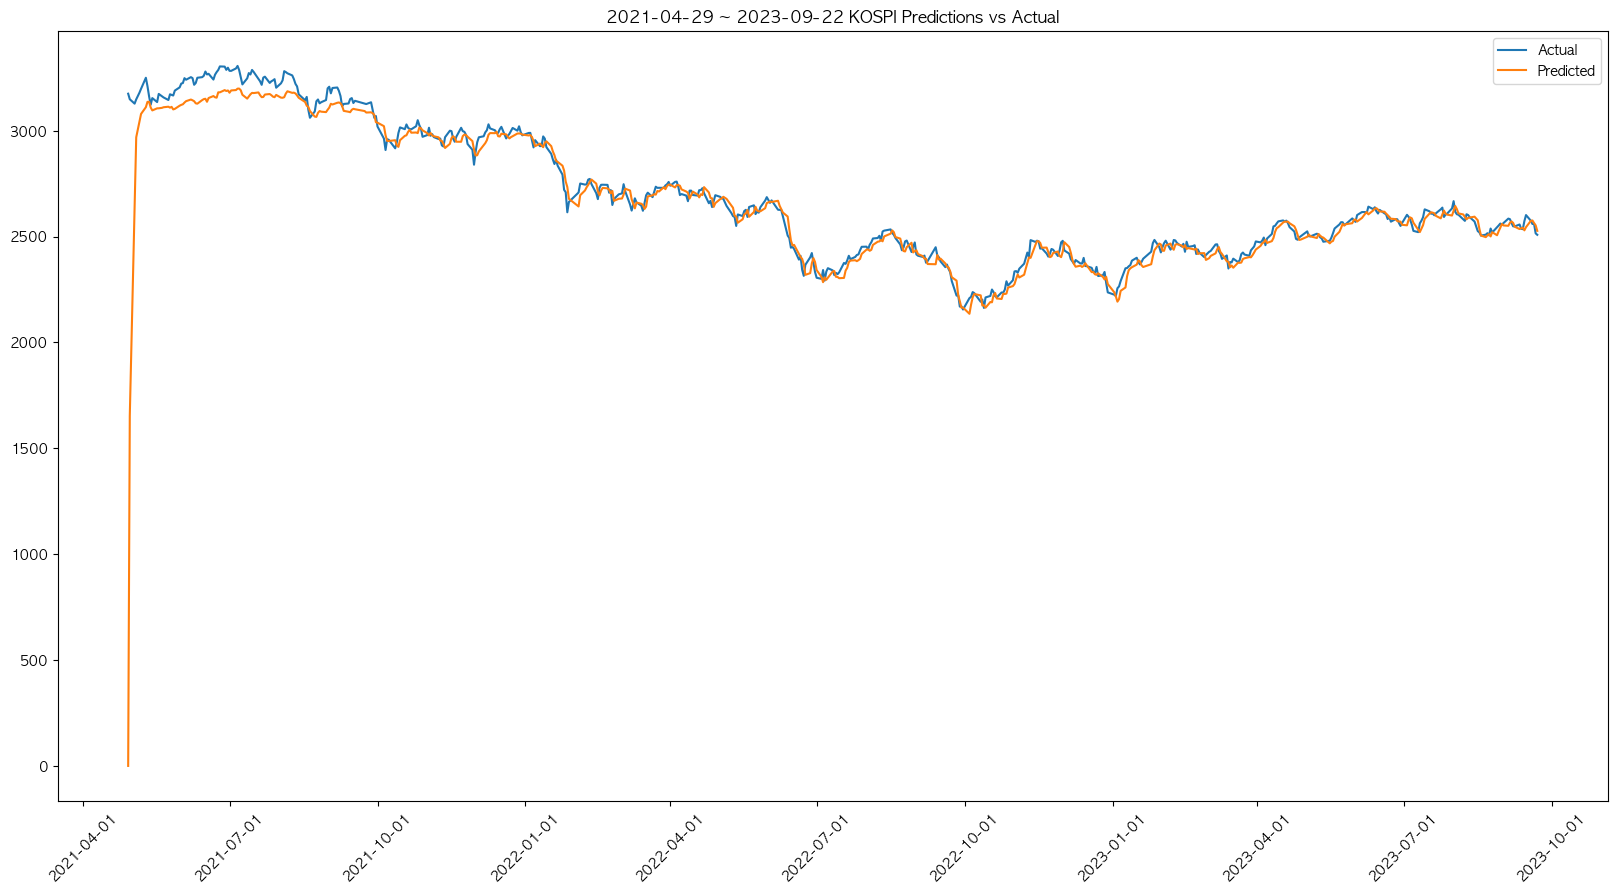

In [59]:
import matplotlib.dates as mdates
import datetime

# parse index of test_set
test_set_index = test_set.index

# Plot the results
plt.figure(figsize=(20, 10))
plt.title("2021-04-29 ~ 2023-09-22 KOSPI Predictions vs Actual")
plt.plot(test_set_index[10:], testY_inverse, label='Actual')
plt.plot(test_set_index[10:], pred_inverse, label='Predicted')

## Set x-axis as dates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

초반 며칠의 예측 성능이 크게 떨어지는데 그 이유를 잘 모르겠다...

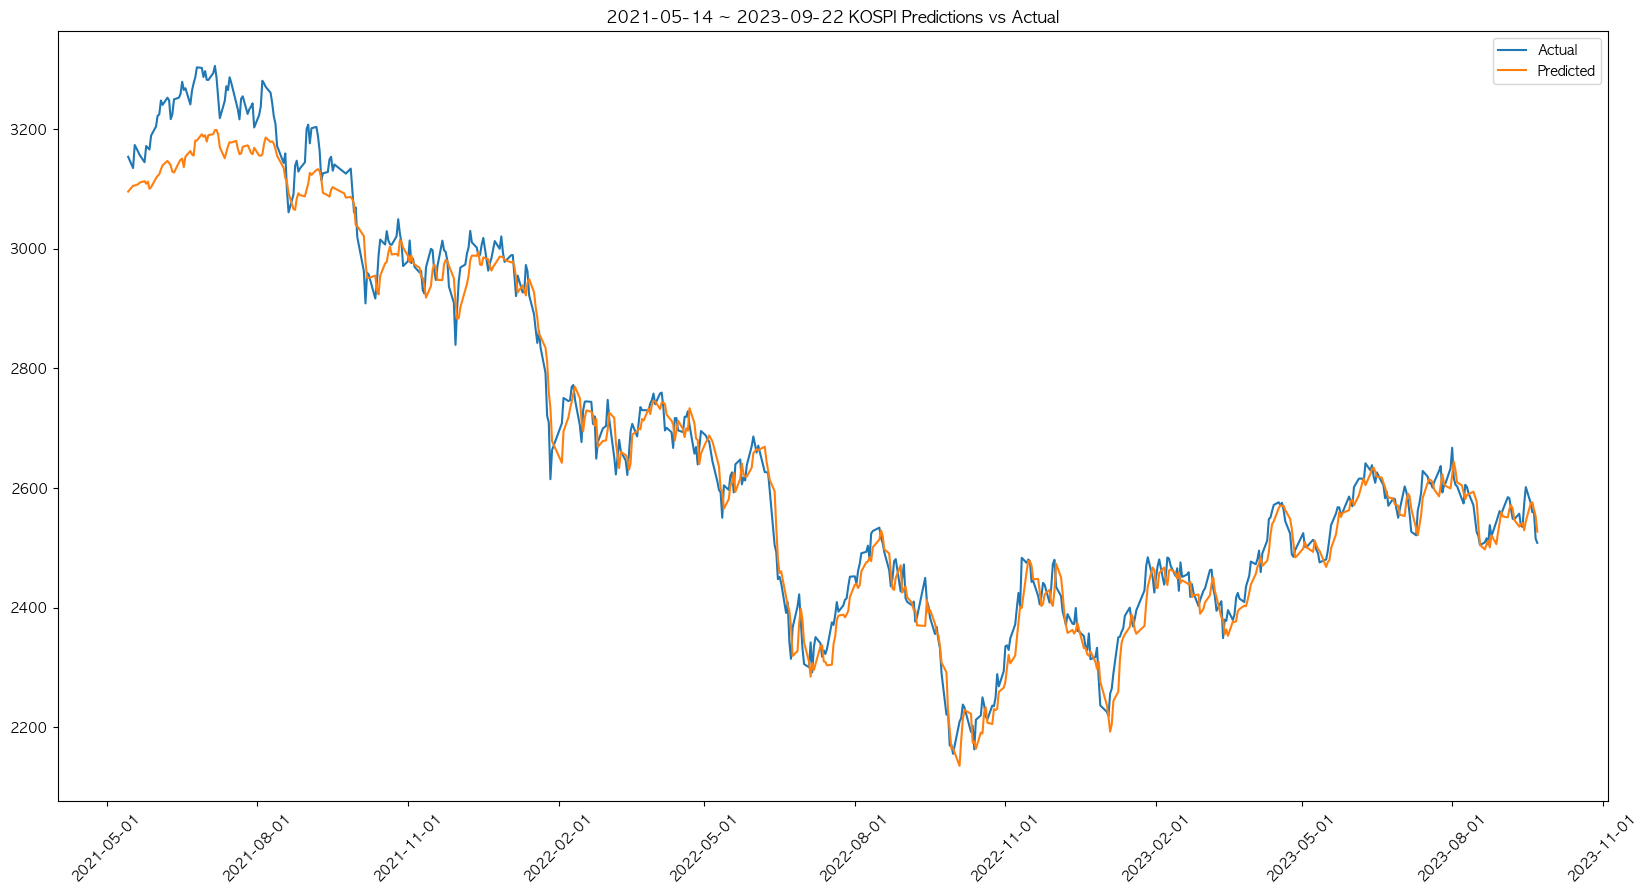

In [70]:
# Plot the results
plt.figure(figsize=(20, 10))
plt.title("2021-05-14 ~ 2023-09-22 KOSPI Predictions vs Actual")
plt.plot(test_set_index[20:], testY_inverse[10:], label='Actual')
plt.plot(test_set_index[20:], pred_inverse[10:], label='Predicted')

## Set x-axis as dates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [71]:
## Save Model
torch.save(model.state_dict(), 'LSTM KOSPI Prediction on 10-day data.pt')